In [14]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import numpy as np
import pandas as pd
from google.colab import drive

In [120]:
# Read the CSV file from My Google Drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Transportation_Network_Providers_-_Trips_2.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-120-64c1ae7489be>:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Transportation_Network_Providers_-_Trips_2.csv')


In [ ]:
df.head()

In [122]:
df.shape

(280657, 21)

In [123]:
df.dtypes

Trip ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tip                           float64
Additional Charges            float64
Trip Total                    float64
Shared Trip Authorized         object
Trips Pooled                  float64
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid Location      object
dtype: object

In [124]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(280657, 21)

In [125]:
df.dropna(inplace=True)

In [7]:
df.shape

(198766, 21)

In [126]:
shared_trips = df['Shared Trip Authorized'].value_counts()
print(shared_trips)

False    167648
True      31118
Name: Shared Trip Authorized, dtype: int64


In [127]:
# compare the trip duration and distance of shared trips versus non-shared trips
shared_trips_duration = df.loc[df['Shared Trip Authorized'] == True, 'Trip Seconds'].mean()
print(f"The average duration of shared trips is:{shared_trips_duration: .2f} seconds.")
non_shared_trips_duration = df.loc[df['Shared Trip Authorized'] == False, 'Trip Seconds'].mean()
print(f"The average duration of non_shared trips is:{non_shared_trips_duration: .2f} seconds")

shared_trips_distance = df.loc[df['Shared Trip Authorized'] == True, 'Trip Miles'].mean()
print(f"The average distance of shared trips is:{shared_trips_distance: .2f} Miles")
non_shared_trips_distance = df.loc[df['Shared Trip Authorized'] == False, 'Trip Miles'].mean()
print(f"The average distance of non_shared trips is:{non_shared_trips_distance: .2f} Miles")

The average duration of shared trips is: 1156.53 seconds.
The average duration of non_shared trips is: 928.87 seconds
The average distance of shared trips is: 4.88 Miles
The average distance of non_shared trips is: 4.37 Miles


In [128]:
# Modify the Dataset

# Assume that the "Trip Start Timestamp" column contains date and time strings
df["Start Timestamp"] = pd.to_datetime(df["Trip Start Timestamp"])

# Print the modified dataframe
print(df.dtypes)

Trip ID                               object
Trip Start Timestamp                  object
Trip End Timestamp                    object
Trip Seconds                         float64
Trip Miles                           float64
Pickup Census Tract                  float64
Dropoff Census Tract                 float64
Pickup Community Area                float64
Dropoff Community Area               float64
Fare                                 float64
Tip                                  float64
Additional Charges                   float64
Trip Total                           float64
Shared Trip Authorized                object
Trips Pooled                         float64
Pickup Centroid Latitude             float64
Pickup Centroid Longitude            float64
Pickup Centroid Location              object
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
Dropoff Centroid Location             object
Start Timestamp               datetime64[ns]
dtype: obj

In [129]:
# Extract the day of the week from the date column and store it in a new column
df['Start_day_of_week'] = df['Start Timestamp'].dt.strftime('%A')

In [130]:
# Assume that the "Trip End Timestamp" column contains date and time strings
df["End Timestamp"] = pd.to_datetime(df["Trip End Timestamp"])

# Drop the original "Trip End Timestamp" column
df.drop("Trip End Timestamp", axis=1, inplace=True)

# Print the modified dataframe
print(df.head())

                                    Trip ID    Trip Start Timestamp  \
2  09e6dc28f00a710926385c004c9ef0099671443b  09/17/2019 10:45:00 PM   
3  2c632a97287a94d8d9093e6082f83307435d80a6  11/29/2018 03:00:00 PM   
4  09e6dc7bcc037a2553310b6f6dbc64ab32cddf65  08/06/2019 12:00:00 PM   
5  2c632f3d748c49e9a6aa226fb97f492c7ed93d3a  12/13/2018 06:15:00 PM   
7  2c632f7236325d19bbe558b59148ed5aaf034357  12/14/2018 01:15:00 AM   

   Trip Seconds  Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
2         268.0         1.1         1.703124e+10          1.703124e+10   
3         596.0         2.5         1.703128e+10          1.703108e+10   
4        1266.0         3.7         1.703124e+10          1.703132e+10   
5        1147.0         4.3         1.703184e+10          1.703124e+10   
7         346.0         1.4         1.703107e+10          1.703107e+10   

   Pickup Community Area  Dropoff Community Area  Fare  Tip  ...  \
2                   24.0                    24.0   5.0  0.0 

In [131]:
# extract the hour from the "Start Timestamp" column and convert it to an integer
df["Start hour"] = df["Start Timestamp"].dt.hour.astype(int)

# extract the hour from the "End Timestamp" column and convert it to an integer
df["End hour"] = df["End Timestamp"].dt.hour.astype(int)

In [132]:
# Modify the data to select the required columns and delete the others

# Drop "Trip ID" column
df.drop("Trip ID", axis=1, inplace=True)

# Drop "Pickup Census Tract" column
df.drop("Pickup Census Tract", axis=1, inplace=True)

# Drop "Dropoff Census Tract" column
df.drop("Dropoff Census Tract", axis=1, inplace=True)

# Drop "Pickup Centroid Latitude" column
df.drop("Pickup Centroid Latitude", axis=1, inplace=True)

# Drop "Pickup Centroid Longitude" column
df.drop("Pickup Centroid Longitude", axis=1, inplace=True)

# Drop "Pickup Centroid Location" column
df.drop("Pickup Centroid Location", axis=1, inplace=True)

# Drop "Dropoff Centroid Latitude" column
df.drop("Dropoff Centroid Latitude", axis=1, inplace=True)

# Drop "Dropoff Centroid Longitude" column
df.drop("Dropoff Centroid Longitude", axis=1, inplace=True)

# Drop "Dropoff Centroid Location" column
df.drop("Dropoff Centroid Location", axis=1, inplace=True)


In [45]:
# map the day names to numerical values
df['Start_day_of_week'] = df['Start_day_of_week'].map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6})


In [117]:
df.dtypes


Trip Start Timestamp       object
Trip Seconds              float64
Trip Miles                float64
Pickup Community Area     float64
Dropoff Community Area    float64
Fare                      float64
Tip                       float64
Additional Charges        float64
Trip Total                float64
Shared Trip Authorized      int64
Trips Pooled              float64
Start_day_of_week         float64
Start hour                  int64
End hour                    int64
dtype: object

In [47]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense

In [48]:
# Define the dataset
df['Shared Trip Authorized'] = df['Shared Trip Authorized'].astype(int)


In [49]:
# get the indices of True and False values separately
true_indices = df[df["Shared Trip Authorized"] == 1].index
false_indices = df[df["Shared Trip Authorized"] == 0].index

# randomly sample an equal number of True and False values
num_samples = min(len(true_indices), len(false_indices))
true_samples = df.loc[true_indices].sample(n=num_samples)
false_samples = df.loc[false_indices].sample(n=num_samples)

# concatenate the sampled True and False values into a single dataframe
selected_data = pd.concat([true_samples, false_samples])

In [50]:
# Select the required data for model
X = selected_data.loc[:, ['Trip Seconds', 'Trip Miles', 'Pickup Community Area', 'Dropoff Community Area', 'Fare','Start hour', 'Start_day_of_week']]
y = selected_data.loc[:, 'Shared Trip Authorized']

print(X.shape)
print(X.dtypes)
print(y.shape)
print(y.dtypes)

(62236, 7)
Trip Seconds              float64
Trip Miles                float64
Pickup Community Area     float64
Dropoff Community Area    float64
Fare                      float64
Start hour                  int64
Start_day_of_week           int64
dtype: object
(62236,)
int64


In [51]:
# Split the data into training, testing, and cross validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(49788, 7)
(6224, 7)
(6224, 7)


In [52]:
# Define the model architecture 1
model_1 = Sequential()
model_1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [53]:
# Define the model architecture 2
model_2 = Sequential()
model_2.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [54]:
# Define the model architecture 3
model_3 = Sequential()
model_3.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

In [55]:
# Define the model architecture 4
model_4 = Sequential()
model_4.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(16, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

In [56]:
# Define the model architecture 5
hidden_units = 100


model_5 = Sequential()
model_5.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=keras.regularizers.l2(0)))
model_5.add(Dense(hidden_units, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0)))
model_5.add(Dense(hidden_units, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0)))
model_5.add(Dense(hidden_units, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0)))
model_5.add(Dense(hidden_units, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0)))
model_5.add(Dense(hidden_units, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0)))
model_5.add(Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.0)))

In [57]:
# Define the model architecture 6
model_6 = Sequential()
model_6.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
model_6.add(Dense(hidden_units, activation='relu'))
model_6.add(Dense(hidden_units, activation='relu'))
model_6.add(Dense(hidden_units, activation='relu'))
model_6.add(Dense(hidden_units, activation='relu'))
model_6.add(Dense(hidden_units, activation='relu'))
model_6.add(Dense(hidden_units, activation='relu'))
model_6.add(Dense(hidden_units, activation='relu'))
model_6.add(Dense(hidden_units, activation='relu'))
model_6.add(Dense(hidden_units, activation='relu'))
model_6.add(Dense(hidden_units, activation='relu'))
model_6.add(Dense(hidden_units, activation='relu'))
model_6.add(Dense(hidden_units, activation='relu'))
model_6.add(Dense(1, activation='sigmoid'))

In [58]:
# Compile the models

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [59]:
# Train the model_1
history = model_1.fit(X_val, y_val, epochs=100, batch_size=32)

Epoch 1/100
195/195 [==============================] - 1s 2ms/step - loss: 3.0419 - binary_accuracy: 0.6199
Epoch 2/100
195/195 [==============================] - 1s 3ms/step - loss: 0.6758 - binary_accuracy: 0.6968
Epoch 3/100
195/195 [==============================] - 1s 3ms/step - loss: 0.6117 - binary_accuracy: 0.7349
Epoch 4/100
195/195 [==============================] - 1s 3ms/step - loss: 0.5715 - binary_accuracy: 0.7498
Epoch 5/100
195/195 [==============================] - 1s 3ms/step - loss: 0.6168 - binary_accuracy: 0.7449
Epoch 6/100
195/195 [==============================] - 1s 3ms/step - loss: 0.5550 - binary_accuracy: 0.7670
Epoch 7/100
195/195 [==============================] - 1s 3ms/step - loss: 0.5243 - binary_accuracy: 0.7852
Epoch 8/100
195/195 [==============================] - 0s 2ms/step - loss: 0.5376 - binary_accuracy: 0.7918
Epoch 9/100
195/195 [==============================] - 0s 2ms/step - loss: 0.6698 - binary_accuracy: 0.7649
Epoch 10/100
195/195 [======

In [60]:
# Evaluate the model_1
score_1 = model_1.evaluate(X_val, y_val, verbose=0)
print(f'Test loss: {score_1[0]} / Test accuracy: {score_1[1]}')

Test loss: 0.3187195360660553 / Test accuracy: 0.8809447288513184


In [61]:
# Train the model_2
history = model_2.fit(X_val, y_val, epochs=100, batch_size=32)

Epoch 1/100
195/195 [==============================] - 2s 4ms/step - loss: 1.6965 - binary_accuracy: 0.5182
Epoch 2/100
195/195 [==============================] - 0s 2ms/step - loss: 0.7808 - binary_accuracy: 0.5900
Epoch 3/100
195/195 [==============================] - 0s 2ms/step - loss: 0.6359 - binary_accuracy: 0.6775
Epoch 4/100
195/195 [==============================] - 0s 2ms/step - loss: 0.5533 - binary_accuracy: 0.7415
Epoch 5/100
195/195 [==============================] - 0s 2ms/step - loss: 0.6419 - binary_accuracy: 0.6869
Epoch 6/100
195/195 [==============================] - 0s 2ms/step - loss: 0.5963 - binary_accuracy: 0.7478
Epoch 7/100
195/195 [==============================] - 0s 2ms/step - loss: 0.4673 - binary_accuracy: 0.8001
Epoch 8/100
195/195 [==============================] - 0s 2ms/step - loss: 0.4352 - binary_accuracy: 0.8151
Epoch 9/100
195/195 [==============================] - 0s 2ms/step - loss: 0.4303 - binary_accuracy: 0.8156
Epoch 10/100
195/195 [======

In [62]:
# Evaluate the model_2
score_2 = model_2.evaluate(X_val, y_val, verbose=0)
print(f'Test loss: {score_2[0]} / Test accuracy: {score_2[1]}')

Test loss: 0.30485185980796814 / Test accuracy: 0.8774100542068481


In [63]:
# Train the model_3
history = model_3.fit(X_val, y_val, epochs=100, batch_size=32)

Epoch 1/100
195/195 [==============================] - 2s 4ms/step - loss: 1.6946 - binary_accuracy: 0.5210
Epoch 2/100
195/195 [==============================] - 1s 4ms/step - loss: 0.7620 - binary_accuracy: 0.5901
Epoch 3/100
195/195 [==============================] - 1s 4ms/step - loss: 0.6478 - binary_accuracy: 0.6748
Epoch 4/100
195/195 [==============================] - 0s 3ms/step - loss: 0.5417 - binary_accuracy: 0.7433
Epoch 5/100
195/195 [==============================] - 1s 3ms/step - loss: 0.5424 - binary_accuracy: 0.7532
Epoch 6/100
195/195 [==============================] - 1s 3ms/step - loss: 0.4755 - binary_accuracy: 0.7992
Epoch 7/100
195/195 [==============================] - 1s 3ms/step - loss: 0.4737 - binary_accuracy: 0.7897
Epoch 8/100
195/195 [==============================] - 0s 2ms/step - loss: 0.4531 - binary_accuracy: 0.8077
Epoch 9/100
195/195 [==============================] - 1s 3ms/step - loss: 0.4651 - binary_accuracy: 0.7996
Epoch 10/100
195/195 [======

In [64]:
# Evaluate the model_3
score_3 = model_3.evaluate(X_val, y_val, verbose=0)
print(f'Test loss: {score_3[0]} / Test accuracy: {score_3[1]}')

Test loss: 0.3141501545906067 / Test accuracy: 0.8679305911064148


In [65]:
# Train the model_4
history = model_4.fit(X_val, y_val, epochs=100, batch_size=32)

Epoch 1/100
195/195 [==============================] - 2s 3ms/step - loss: 1.0546 - binary_accuracy: 0.5588
Epoch 2/100
195/195 [==============================] - 0s 2ms/step - loss: 0.7012 - binary_accuracy: 0.6309
Epoch 3/100
195/195 [==============================] - 1s 3ms/step - loss: 0.6873 - binary_accuracy: 0.6653
Epoch 4/100
195/195 [==============================] - 1s 3ms/step - loss: 0.5792 - binary_accuracy: 0.7367
Epoch 5/100
195/195 [==============================] - 1s 3ms/step - loss: 0.5474 - binary_accuracy: 0.7539
Epoch 6/100
195/195 [==============================] - 0s 2ms/step - loss: 0.5148 - binary_accuracy: 0.7649
Epoch 7/100
195/195 [==============================] - 1s 3ms/step - loss: 0.4495 - binary_accuracy: 0.8093
Epoch 8/100
195/195 [==============================] - 1s 3ms/step - loss: 0.4863 - binary_accuracy: 0.7887
Epoch 9/100
195/195 [==============================] - 1s 3ms/step - loss: 0.4522 - binary_accuracy: 0.8038
Epoch 10/100
195/195 [======

In [66]:
# Evaluate the model_4
score_4 = model_4.evaluate(X_val, y_val, verbose=0)
print(f'Test loss: {score_4[0]} / Test accuracy: {score_4[1]}')

Test loss: 0.3274873197078705 / Test accuracy: 0.8611825108528137


In [67]:
# Train the model_5
history = model_5.fit(X_val, y_val, epochs=100, batch_size=32)

Epoch 1/100
195/195 [==============================] - 2s 4ms/step - loss: 1.4112 - binary_accuracy: 0.5370
Epoch 2/100
195/195 [==============================] - 1s 3ms/step - loss: 0.6766 - binary_accuracy: 0.5996
Epoch 3/100
195/195 [==============================] - 1s 3ms/step - loss: 0.6371 - binary_accuracy: 0.6623
Epoch 4/100
195/195 [==============================] - 1s 4ms/step - loss: 0.5547 - binary_accuracy: 0.7277
Epoch 5/100
195/195 [==============================] - 1s 3ms/step - loss: 0.5150 - binary_accuracy: 0.7588
Epoch 6/100
195/195 [==============================] - 1s 3ms/step - loss: 0.4445 - binary_accuracy: 0.8035
Epoch 7/100
195/195 [==============================] - 1s 4ms/step - loss: 0.4414 - binary_accuracy: 0.8025
Epoch 8/100
195/195 [==============================] - 1s 3ms/step - loss: 0.4163 - binary_accuracy: 0.8138
Epoch 9/100
195/195 [==============================] - 1s 3ms/step - loss: 0.4081 - binary_accuracy: 0.8212
Epoch 10/100
195/195 [======

In [68]:
# Evaluate the model_5
score_5 = model_5.evaluate(X_val, y_val, verbose=0)
print(f'Test loss: {score_5[0]} / Test accuracy: {score_5[1]}')

Test loss: 0.2889428436756134 / Test accuracy: 0.8835154175758362


In [69]:
# Train the model_6
history = model_6.fit(X_val, y_val, epochs=100, batch_size=32)

Epoch 1/100
195/195 [==============================] - 4s 5ms/step - loss: 0.6981 - binary_accuracy: 0.5259
Epoch 2/100
195/195 [==============================] - 1s 5ms/step - loss: 0.6870 - binary_accuracy: 0.5631
Epoch 3/100
195/195 [==============================] - 1s 5ms/step - loss: 0.6854 - binary_accuracy: 0.5611
Epoch 4/100
195/195 [==============================] - 2s 8ms/step - loss: 0.6858 - binary_accuracy: 0.5596
Epoch 5/100
195/195 [==============================] - 2s 8ms/step - loss: 0.6784 - binary_accuracy: 0.5776
Epoch 6/100
195/195 [==============================] - 1s 6ms/step - loss: 0.6495 - binary_accuracy: 0.6192
Epoch 7/100
195/195 [==============================] - 1s 5ms/step - loss: 0.6913 - binary_accuracy: 0.5315
Epoch 8/100
195/195 [==============================] - 1s 5ms/step - loss: 0.6894 - binary_accuracy: 0.5421
Epoch 9/100
195/195 [==============================] - 1s 5ms/step - loss: 0.6909 - binary_accuracy: 0.5411
Epoch 10/100
195/195 [======

In [70]:
# Evaluate the model_6
score_6 = model_6.evaluate(X_val, y_val, verbose=0)
print(f'Test loss: {score_6[0]} / Test accuracy: {score_6[1]}')

Test loss: 0.3038906157016754 / Test accuracy: 0.8725899457931519


In [71]:
# Choose The Final Model
model_loss = [score_1[0], score_2[0], score_3[0], score_4[0], score_5[0], score_6[0]]
model_accuracy = [score_1[1], score_2[1], score_3[1], score_4[1], score_5[1], score_6[1]]
                  
# Find the index of the model with the minimum loss
min_loss_index = model_loss.index(min(model_loss))

# Find the index of the model with the maximum accuracy
max_accuracy_index = model_accuracy.index(max(model_accuracy))

# Determine the best model based on the minimum loss and maximum accuracy
if min_loss_index == max_accuracy_index:
    print("The best model is Model ", min_loss_index+1, " with a loss of ", model_loss[min_loss_index], " and an accuracy of ", model_accuracy[max_accuracy_index])
elif min_loss_index < max_accuracy_index:
    print("The best model based on the minimum loss is Model ", min_loss_index+1, " with a loss of ", model_loss[min_loss_index])
else:
    print("The best model based on the maximum accuracy is Model ", max_accuracy_index+1, " with an accuracy of ", model_accuracy[max_accuracy_index])

The best model is Model  5  with a loss of  0.2889428436756134  and an accuracy of  0.8835154175758362


In [72]:
# Train the Final Model

model = model_5
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1556/1556 [==============================] - 5s 3ms/step - loss: 0.3367 - binary_accuracy: 0.8602
Epoch 2/100
1556/1556 [==============================] - 6s 4ms/step - loss: 0.3307 - binary_accuracy: 0.8619
Epoch 3/100
1556/1556 [==============================] - 5s 3ms/step - loss: 0.3248 - binary_accuracy: 0.8658
Epoch 4/100
1556/1556 [==============================] - 7s 4ms/step - loss: 0.3274 - binary_accuracy: 0.8639
Epoch 5/100
1556/1556 [==============================] - 6s 4ms/step - loss: 0.3223 - binary_accuracy: 0.8662
Epoch 6/100
1556/1556 [==============================] - 7s 5ms/step - loss: 0.3242 - binary_accuracy: 0.8664
Epoch 7/100
1556/1556 [==============================] - 6s 4ms/step - loss: 0.3234 - binary_accuracy: 0.8667
Epoch 8/100
1556/1556 [==============================] - 7s 4ms/step - loss: 0.3186 - binary_accuracy: 0.8687
Epoch 9/100
1556/1556 [==============================] - 6s 4ms/step - loss: 0.3205 - binary_accuracy: 0.8677
Epoch 10/1

In [73]:
# Evaluate the Final Model
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Model loss: {score[0]} \nModel accuracy: {score[1]}')

Model loss: 0.2902596592903137 
Model accuracy: 0.8865681290626526


In [75]:
# Use the model for prediction

# Choose a sample from dataset for prediction
sample = 528
X_new = X_val.iloc[sample].values.reshape(1, -1)

y_correct = y_val.iloc[sample]

# Predict
y_pred = model.predict(X_new)

if y_pred > 0.5:
  y_predict = 1
  print("Predict if this trip is going to be shared?   YES")
else:
  y_predict = 0
  print("Predict if this trip is going to be shared?   NO")

print("===================================================================\n")
print(f"The prediction is: {y_pred}   /   The true answer is: {y_correct}")

print("===================================================================\n")

if y_predict == y_correct:
  print("Prediction: CORRECT!")
else:
  print("Prediction: WRONG!")

1/1 [==============================] - 0s 44ms/step
Predict if this trip is going to be shared?   YES

The prediction is: [[0.98614216]]   /   The true answer is: 1

Prediction: CORRECT!


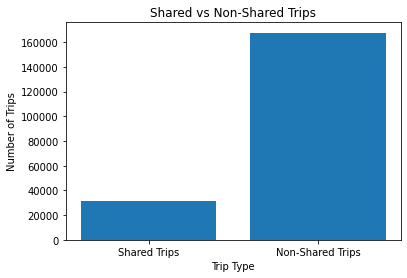

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of shared and non-shared trips
num_shared_trips = df[df["Shared Trip Authorized"] == True]["Shared Trip Authorized"].count()
num_non_shared_trips = df[df["Shared Trip Authorized"] == False]["Shared Trip Authorized"].count()

# Create the bar chart
plt.bar(["Shared Trips", "Non-Shared Trips"], [num_shared_trips, num_non_shared_trips])
plt.title("Shared vs Non-Shared Trips")
plt.xlabel("Trip Type")
plt.ylabel("Number of Trips")
plt.show()

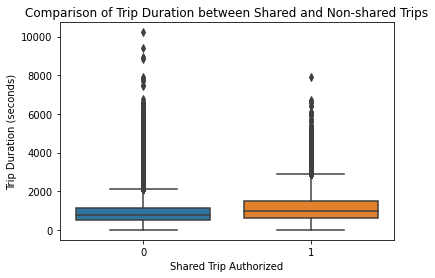

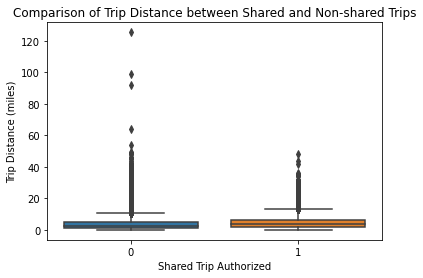

In [78]:
# Create a box plot for trip duration
sns.boxplot(x="Shared Trip Authorized", y="Trip Seconds", data=df)
plt.title("Comparison of Trip Duration between Shared and Non-shared Trips")
plt.xlabel("Shared Trip Authorized")
plt.ylabel("Trip Duration (seconds)")
plt.show()

# Create a box plot for trip distance
sns.boxplot(x="Shared Trip Authorized", y="Trip Miles", data=df)
plt.title("Comparison of Trip Distance between Shared and Non-shared Trips")
plt.xlabel("Shared Trip Authorized")
plt.ylabel("Trip Distance (miles)")
plt.show()

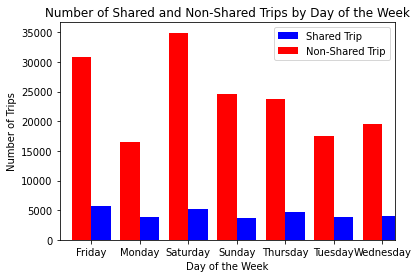

In [134]:
# group the data by day of the week and shared trip authorization
trips_by_day_and_shared = df.groupby(['Start_day_of_week', 'Shared Trip Authorized']).size().unstack()

# reset the index and rename the columns for plotting
shared_trips = trips_by_day_and_shared[1].reset_index().rename(columns={1: 'count'})
non_shared_trips = trips_by_day_and_shared[0].reset_index().rename(columns={0: 'count'})

# create the bar chart
fig, ax = plt.subplots()
shared_trips.plot(x='Start_day_of_week', y='count', kind='bar', width=0.4, position=0, ax=ax, color='blue', label='Shared Trip')
non_shared_trips.plot(x='Start_day_of_week', y='count', kind='bar', width=0.4, position=1, ax=ax, color='red', label='Non-Shared Trip')

# set the chart title and axis labels
plt.title('Number of Shared and Non-Shared Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.xticks(rotation=0)
plt.ylabel('Number of Trips')

# show the chart
plt.show()

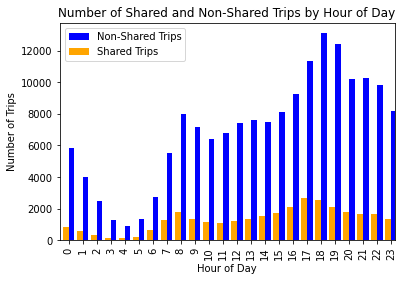

In [82]:
# Group data by start hour and shared trip authorized
hourly_trips = df.groupby(['Start hour', 'Shared Trip Authorized'])['Start hour'].count().unstack()

# Plot the bar chart with separate bars for shared and non-shared trips
fig, ax = plt.subplots()
hourly_trips[0].plot(kind='bar', position=0, width=0.4, color='blue', ax=ax, label='Non-Shared Trips')
hourly_trips[1].plot(kind='bar', position=1, width=0.4, color='orange', ax=ax, label='Shared Trips')

# Set the chart title and axis labels
plt.title('Number of Shared and Non-Shared Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')

# Add legend
plt.legend()

# Show the chart
plt.show()

In [137]:
pip install mpld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
import mpld3

# save the chart as an interactive HTML file
mpld3.save_html(fig, 'trips_by_day_and_shared.html')
mpld3.save_html(fig, 'hourly_trips.html')